<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題4.1</h4>

[去年の夏のデータ](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream2.txt)をダウンロードし、散布図を描いてください。

In [10]:
import urllib.request as req
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream2.txt'
req.urlretrieve(url, 'ice_cream2.txt')

('ice_cream2.txt', <http.client.HTTPMessage at 0x10bcf1fd0>)

In [13]:
col1,col2,col3 = [],[],[]
for i, line in enumerate(open('ice_cream2.txt', encoding='utf-8')):
    if i == 0:
        continue
    _ = line.split(' ')
    col1.append(int(_[0]))
    col2.append(int(_[1]))
    col3.append(int(_[2]))

In [14]:
col3

[382,
 324,
 338,
 317,
 341,
 360,
 339,
 329,
 218,
 402,
 342,
 205,
 368,
 196,
 304,
 294,
 275,
 336,
 384,
 368]

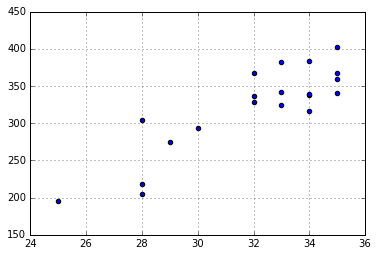

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(col2,col3)
plt.grid()
plt.show()

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題4.4</h4>

[去年の夏のデータ](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream2.txt)をダウンロードし、以下の問に答えてください。

(1)　相関係数を求めてください。
    * 相関係数＝偏差積の平均／（xの標準偏差＊yの標準偏差）

(2)　回帰直線の傾きを求めてください。
    * 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））

(3)　回帰直線のy切片を求めてください。

(4)　散布図に回帰直線を描き入れてください。

In [17]:
# 平均値を求める関数
def average(list):
    return np.sum(list)/len(list)
# 分散を求める関数
def variance(list):
    mu = average(list)
    diff = np.array(list) - mu
    return np.sum(np.square(diff))/len(list)
# 標準偏差を求める関数
def standard_deviation(list):
    return np.sqrt(variance(list))
# 共分散 = 偏差積の平均 （偏差値、ではありません。偏差積、です）
def covariance(list1, list2):
    mu1,mu2 = average(list1), average(list2)
    diff1, diff2 = np.array(list1) - mu1, np.array(list2) - mu2
    return np.sum(diff1 * diff2)/len(list1)
# 相関係数 = 共分散を list1, list2 の標準偏差で割ったもの
def correlation(list1, list2):
    return covariance(list1,list2)/(standard_deviation(list1)*standard_deviation(list2))

In [19]:
# 相関係数を求める
import numpy as np
correlation(col2, col3)

0.87035187693544258

In [23]:
# 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））を求める関数を作ってください。
def a_fit(xlist, ylist):
    return correlation(xlist,ylist) * (standard_deviation(ylist)/standard_deviation(xlist))

In [24]:
# y切片＝yの平均－（傾き＊xの平均）を求める関数を作ってください。
def b_fit(xlist, ylist):
    return average(ylist) - (a_fit(xlist,ylist) * average(xlist))

In [25]:
# 回帰直線の式
print("y = ax + b; (a, b) = ({0}, {1})".format(a_fit(col2, col3), b_fit(col2, col3)))

y = ax + b; (a, b) = (17.24825704759018, -229.9818126705062)


In [26]:
# たとえば最高気温 31度のときの予測客数は
a_fit(col2, col3) * 31 + b_fit(col2, col3)

304.71415580478936

In [28]:
a, b = a_fit(col2,col3), b_fit(col2,col3)

In [29]:
# 回帰直線を描くための準備として、回帰直線の式を参考に、xの最小値〜最大値の範囲のxに対応するyの予測値（fitted_y）を計算してください。
test_x = []
fitted_y = []
for x in range(min(col2), max(col2)+1):
    test_x.append(x)
    fitted_y.append(a*x+b)

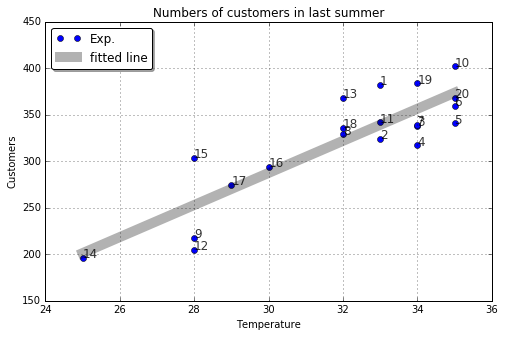

In [30]:
# 散布図と回帰直線を描く。
plt.figure(figsize=(8,5))
plt.plot(col2,col3,'bo', label='Exp.')
plt.plot(test_x,fitted_y,'k-', label='fitted line', linewidth=10, alpha=0.3)
plt.title("Numbers of customers in last summer")
plt.xlabel("Temperature")
plt.ylabel("Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.show()

<h4 style="padding: 0.25em 0.5em;color: #494949;background: transparent;border-left: solid 5px #7db4e6;">課題4.5</h4>

[店舗別８月の平均客数データ（12店舗）](https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt)をダウンロードし、相関係数、回帰直線の傾き、回帰直線のy切片を求め、散布図に回帰直線を描き入れてください。

In [32]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt'
req.urlretrieve(url, 'shop_distance.txt')

('shop_distance.txt', <http.client.HTTPMessage at 0x10d3e8400>)

In [35]:
col1,col2,col3 = [],[],[]
for i, line in enumerate(open('shop_distance.txt', encoding='utf-8')):
    if i == 0:
        continue
    _ = line.split(' ')
    col1.append(int(_[0]))
    col2.append(int(_[1]))
    col3.append(int(_[2]))

In [36]:
correlation(col2,col3)

-0.9795221182977909

In [37]:
a, b = a_fit(col2,col3), b_fit(col2,col3)
print('y = ax + b; ({0},{1})'.format(a,b))

y = ax + b; (-0.47614044298381675,755.3495972099588)


In [38]:
test_x = []
fitted_y = []
for x in range(min(col2), max(col2)+1):
    test_x.append(x)
    fitted_y.append(a*x+b)

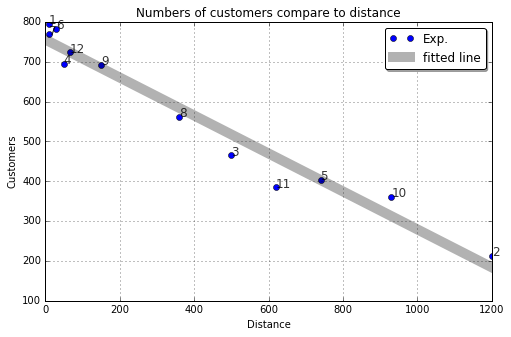

In [41]:
# 散布図と回帰直線を描く。
plt.figure(figsize=(8,5))
plt.plot(col2,col3,'bo', label='Exp.')
plt.plot(test_x,fitted_y,'k-', label='fitted line', linewidth=10, alpha=0.3)
plt.title("Numbers of customers compare to distance")
plt.xlabel("Distance")
plt.ylabel("Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.show()